# Feature-Scaling

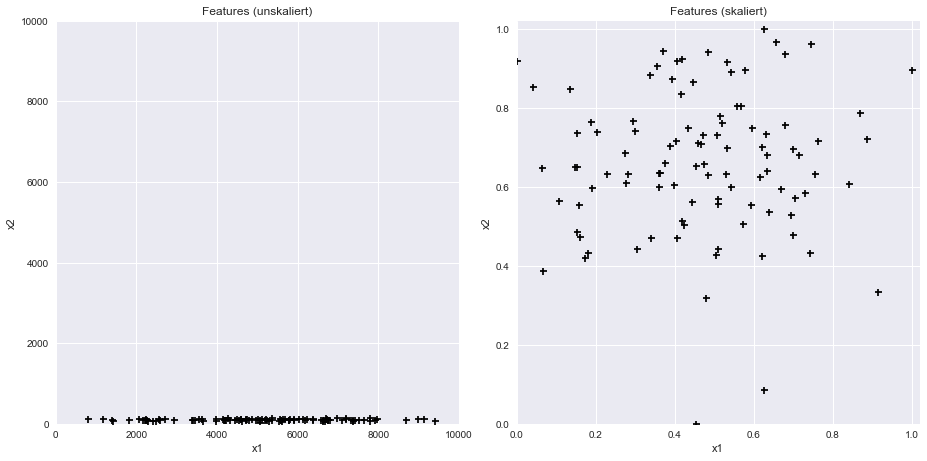

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
x1 = np.random.normal(5000, 2000, N)
x2 = np.random.normal(100, 20, N)
plt.style.use('seaborn')
fig, ax = plt.subplots(1,2, figsize=(16,7))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.0, 
                    hspace=0.1)

#fig.tight_layout()
ax[0].set_xlim(0,10000)
ax[0].set_ylim(0,10000)
ax[0].set_aspect('equal')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].set_title('Features (unskaliert)')
ax[0].scatter(x1, x2, marker='+', color='black')
ax[1].set_xlim(0,1.02)
ax[1].set_ylim(0,1.02)
ax[1].set_aspect('equal')
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')
ax[1].set_title('Features (skaliert)')
ax[1].scatter((x1 - x1.min())/(x1.max()-x1.min()), (x2 - x2.min())/(x2.max()-x2.min()), marker='+', color='black')

plt.savefig('created-images\\11-feature-skalierung.png')
plt.show()
#print(f"x1-min/mean/x1_max = {x1.min()} / {x1.mean()}/ {x1.max()}")
#print(f"x2-min/mean/x2_max = {x2.min()} / {x2.mean()} / {x2.max()}")

# Feature Binning

In [11]:
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np

# y muss eine Spaltenform haben, also shape [n,1]
y = np.array([[0],[1],[6],[3],[4],[5],[6],[7],[8],[9],[10]])

est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
est.fit(y)

print( est.bin_edges_)
yt = est.transform( y )
print(yt)

[array([ 0. ,  2.5,  5. ,  7.5, 10. ])]
[[0.]
 [0.]
 [2.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]]


One-Hot-Encoding

## Ein Feature

In [33]:
from sklearn.preprocessing import OneHotEncoder

y = np.array([  ["virginica"], 
                ["setosa"], 
                ["versicolor"], 
                ["virginica"]
            ])

enc = OneHotEncoder(sparse=False)

# Beachten sie den shape der Eingabe zu enc.fit: (4,1)!
enc.fit( y )

print("\nShape von der Daten: \n", y.shape)
print("\nKategorien         : \n", enc.categories_) # Note: Typ ist Liste!

# Transformieren eines Wertes
#print("\nOne-Hot-Encoding von ['virginica'] : \n", enc.transform( [['virginica'], ['setosa']] ) )
print("\nOne-Hot-Encoding von ['virginica'] : \n", enc.transform( y ) )


Shape von der Daten: 
 (4, 1)

Kategorien         : 
 [array(['setosa', 'versicolor', 'virginica'], dtype='<U10')]

One-Hot-Encoding von ['virginica'] : 
 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Zwei Features

In [40]:
from sklearn.preprocessing import OneHotEncoder

y = np.array([
    ['A','B'], 
    ['B','A'], 
    ['A','Z'], 
    ['B','Z'], 
    ['A','Z']
    ])


enc = OneHotEncoder(sparse=False)

# Beachten sie den shape der Eingabe zu enc.fit: (4,2)!
enc.fit( y )

print("\nKategorien: \n", enc.categories_)

# Transformieren eines Wertes - Beachten sie den shape!
print("\nOne-Hot-Encoding von [A,Z] : \n", enc.transform( [['A','Z']] ) )


Kategorien: 
 [array(['A', 'B'], dtype='<U1'), array(['A', 'B', 'Z'], dtype='<U1')]

One-Hot-Encoding von [A,Z] : 
 [[1. 0. 0. 0. 1.]]
